In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from cycler import cycler


In [2]:
units = nsq.Const()


## Oscillations in Vacuum

since there is not interaction Hamiltionian it is irrelevent to consider the the intaction state evolve in vacuum, what is imporant is the probability of oscailltion between differant flavers, that we will consider

(0.0, 1.0)

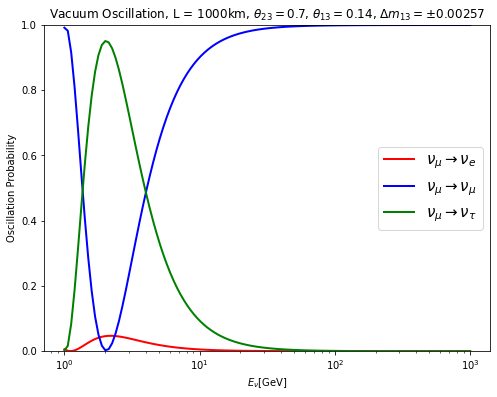

In [26]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)

nuSQ.Set_MixingParametersToDefault()
nuSQ.Set_MixingAngle(1, 2, np.radians(47))
#nuSQ.Set_SquareMassDifference(2, -0.00257)

nuSQ.Set_Body(nsq.Vacuum())
nuSQ.Set_Track(nsq.Vacuum.Track(1000*units.km))

energy_values = np.logspace(0,3,120)

nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
#print(nuSQ.Get_MixingAngle(1,2))

for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0,1,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))
 

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\mu \rightarrow \nu_\tau$")

plt.title(r"Vacuum Oscillation, L = 1000km, $\theta_{23}=0.7$, $\theta_{13}=0.14$, $Δm_{13}=±0.00257$")
plt.legend(fancybox = True, fontsize = 15, loc = 7)
plt.semilogx()
plt.ylim(0.,1.)

In [35]:
def ssss(angle):
    nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)

    nuSQ.Set_MixingParametersToDefault()
    nuSQ.Set_MixingAngle(1, 2, np.radians(angle))
    #nuSQ.Set_SquareMassDifference(2, -0.00257)

    nuSQ.Set_Body(nsq.Vacuum())
    nuSQ.Set_Track(nsq.Vacuum.Track(1000*units.km))

    energy_values = np.logspace(0,3,120)

    nu_mu_to_nu_e = []
    nu_mu_to_nu_mu = []
    nu_mu_to_nu_tau = []
    #print(nuSQ.Get_MixingAngle(1,2))

    for Enu in energy_values:
        nuSQ.Set_E(Enu*units.GeV)
        nuSQ.Set_initial_state(np.array([0,1,0.]),nsq.Basis.flavor)
        nuSQ.EvolveState()
        nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
        nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
        nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))


    #plt.figure(figsize = (8,6))
    #plt.xlabel(r"$E_\nu [{\rm GeV}]$")
    #plt.ylabel(r"Oscillation Probability")
    plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_\mu \rightarrow \nu_e$")
    #plt.plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu \rightarrow \nu_\mu$")
    #plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\mu \rightarrow \nu_\tau$")

    plt.title(r"Vacuum Oscillation, L = 1000km, $\theta_{23}=0.7$, $\theta_{13}=0.14$, $Δm_{13}=±0.00257$")
    #plt.legend(fancybox = True, fontsize = 15, loc = 7)
    #plt.semilogx()
    #plt.ylim(0.,1.)
    
    return plt.plot

## Oscillations in Earth's Atm

In [42]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(0)))

nuSQ.Set_rel_error(1.0e-17)
nuSQ.Set_abs_error(1.0e-17)


### Zenith vs Prob 

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 19.1 µs
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


<Figure size 1080x936 with 0 Axes>

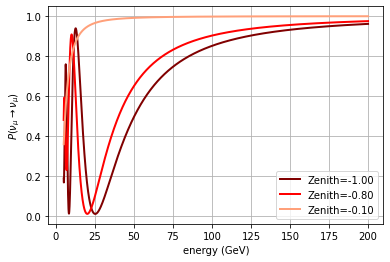

<Figure size 1080x936 with 0 Axes>

In [72]:
Zenith = [-1,-0.8,-0.1]
#anglea =[0.07,0.3,0.5]

for idx, j in enumerate(Zenith):
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(5, 200, 400)*units.GeV

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    #nuSQ_sterile.Set_SquareMassDifference(3, j)
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    

    nuSQ_sterile.Set_Body(nsq.EarthAtm())
    nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(j)))

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 200, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], label = "Zenith={:0.2f}".format(j))


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
plt.figure(figsize = (15,13))

  


## Oscillations throught Earth 


In [12]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.Earth())
nuSQ.Set_Track(nsq.Earth.Track(750.0*units.km))
nuSQ.Set_rel_error(1.0e-15)
nuSQ.Set_abs_error(1.0e-17)


0.0


(0.0, 1.0)

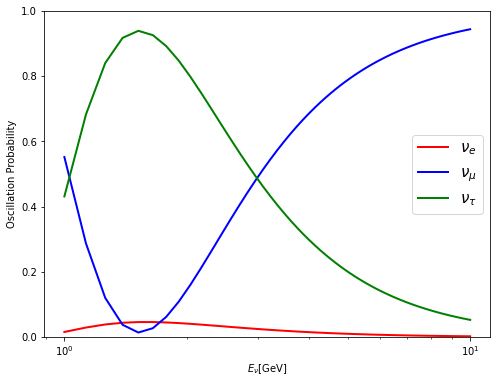

In [76]:
energy_values = np.linspace(1,10,70)
nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.legend(fancybox = True, fontsize = 15, loc = 7)
plt.semilogx()
plt.ylim(0.,1.)

## Propagating in a constant density slab¶


In [77]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.ConstantDensity(13.0,0.5))  # (dnsity , electron fraction )
nuSQ.Set_Track(nsq.ConstantDensity.Track(1000.0*units.km))
nuSQ.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)



(0.0, 1.0)

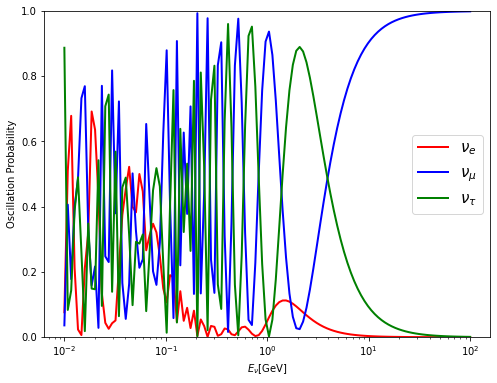

In [78]:



energy_values = np.logspace(-2,2,120)
nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.legend(fancybox = True, fontsize = 15, loc = 7)
plt.semilogx()
plt.ylim(0.,1.)

## 4 neutrinos in constant density

In [16]:
neutrino_flavors = 4
interactions = False
e_nodes = np.geomspace(5, 200, 400)*units.GeV

nuSQ_sterile = nsq.nuSQUIDS(
    e_nodes,
    neutrino_flavors,
    nsq.NeutrinoType.neutrino,
    interactions
)

nuSQ_sterile.Set_MixingParametersToDefault()
# we are looking at a 1 eV sterile neutrino
nuSQ_sterile.Set_SquareMassDifference(3, 2)
nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)

density = 13.0  # g/cm^3
ye = .5  # electron fraction

nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))

Einitial = np.zeros((len(e_nodes), neutrino_flavors))
Einitial[:, 1] = 1

nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

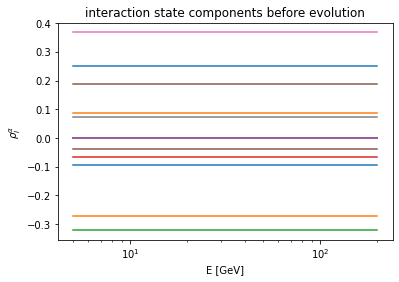

In [17]:
for i in range(16):
    this_state = np.array(
        [nuSQ_sterile.GetState(e_idx, 0).GetComponents()[i]
         for e_idx in range(len(e_nodes))]
    )
    plt.plot(e_nodes/units.GeV,
             this_state                                # this plot gives initial density matrix (pure state)
            )
plt.semilogx()
plt.xlabel("E [GeV]")
plt.ylabel(r"$\rho_I^\alpha$")
plt.title("interaction state components before evolution")
plt.savefig("rho_I_before_evolve_const_dens.pdf")

In [18]:
%%time
nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
nuSQ_sterile.Set_rel_error(1.0e-7)
nuSQ_sterile.Set_abs_error(1.0e-7)
nuSQ_sterile.EvolveState()    # would give density matix at time t_final

CPU times: user 2.51 s, sys: 21.1 ms, total: 2.54 s
Wall time: 2.5 s


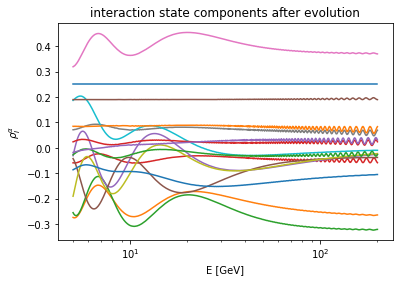

In [19]:
for i in range(16):
    this_state = np.array(
        [nuSQ_sterile.GetState(e_idx, 0).GetComponents()[i]
         for e_idx in range(len(e_nodes))]
    )
    plt.plot(e_nodes/units.GeV,
             this_state
            )
plt.semilogx()   
plt.xlabel("E [GeV]")
plt.ylabel(r"$\rho_I^\alpha$")
plt.title("interaction state components after evolution")
plt.savefig("rho_I_after_evolve_const_dens.pdf")

<Figure size 576x432 with 0 Axes>

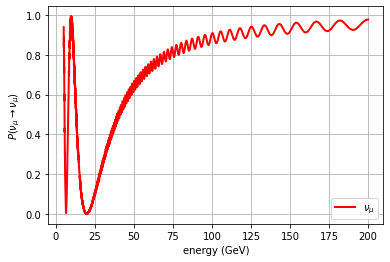

<Figure size 576x432 with 0 Axes>

In [20]:
flav = 1
flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
e_range = np.geomspace(5, 200, 1000)
probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
plt.plot(e_range,probs_fine, lw = 2, color = 'red', label = r"$\nu_\mu$" )

plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
plt.figure(figsize = (8,6))


### Prob vs MixingAngle

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 33.4 µs
CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 21.5 µs
CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 11 µs


[]

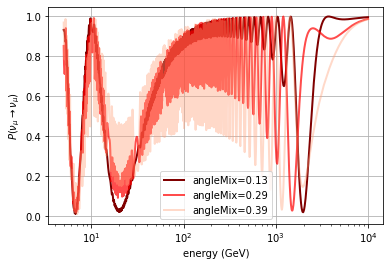

In [7]:
mass = [0.5,1,2]
anglea =[0.07,0.3,0.5]

for idx, j in enumerate(anglea):
    neutrino_flavors = 4
    interactions = False
    e_nodes = np.geomspace(5, 10000, 400)*units.GeV
    

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.antineutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    nuSQ_sterile.Set_SquareMassDifference(3, 1)
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(j))/2.)
    

    density = 13.0  # g/cm^3
    ye = .5  # electron fraction

    nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 10000, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "angleMix={:0.2f}".format(np.arcsin(np.sqrt(j))/2))


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
plt.semilogx()

  


Mixing angle affects the oscillation amplitude in a direct way.

In [11]:
np.sqrt(2)*units.GF*6*10**23 * (1/(units.cm)**3)

7.604477683309039e-14

### Prob vs MassDiff

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 19.3 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.2 µs


<Figure size 1080x936 with 0 Axes>

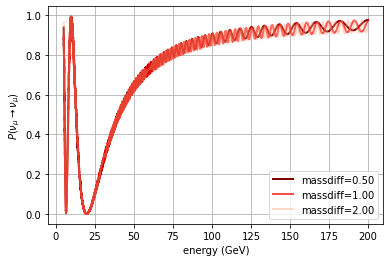

<Figure size 1080x936 with 0 Axes>

In [53]:
mass = [0.5,1,2]
anglea =[0.07,0.3,0.5]

for idx, j in enumerate(mass):
    neutrino_flavors = 4
    interactions = False
    e_nodes = np.geomspace(5, 200, 400)*units.GeV

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    nuSQ_sterile.Set_SquareMassDifference(3, j)
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    

    density = 13.0  # g/cm^3
    ye = .5  # electron fraction

    nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 200, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "massdiff={:0.2f}".format(j))


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
plt.figure(figsize = (15,13))

  


Mass differance affects the oscillation amplitude in a direct way.

### CPPhase Vs Prob


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 21.2 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


[]

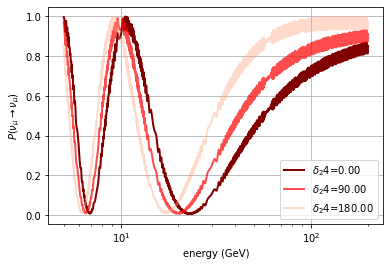

In [37]:
mass = [0.5,1,2]
phase =[0,90,180]

for idx, j in enumerate(phase):
    neutrino_flavors = 4
    interactions = False
    e_nodes = np.geomspace(5, 200, 1000)*units.GeV

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    nuSQ_sterile.Set_SquareMassDifference(3, 2)
    #nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    nuSQ_sterile.Set_MixingAngle(2, 3, np.arcsin(np.sqrt(0.07))/2.)
    
    nuSQ_sterile.Set_CPPhase(1,3,np.radians(j))
    

    density = 13.0  # g/cm^3
    ye = .5  # electron fraction
    
    #nuSQ_sterile.Set_Body(nsq.Earth())
    #nuSQ_sterile.Set_Track(nsq.Earth.Track(1000.0*units.km))

    nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))
    

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 200, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "$\delta_24 $={:0.2f}".format(j))


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
plt.semilogx()


  


### AntiNeutrino 

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 20.5 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


[]

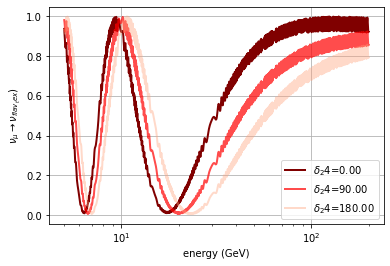

In [47]:
phase =[0,90,180]

for idx, j in enumerate(phase):
    neutrino_flavors = 4
    interactions = False
    e_nodes = np.geomspace(5, 200, 1000)*units.GeV

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.antineutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    nuSQ_sterile.Set_SquareMassDifference(3, 2)
    #nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    nuSQ_sterile.Set_MixingAngle(2, 3, np.arcsin(np.sqrt(0.07))/2.)
    
    nuSQ_sterile.Set_CPPhase(1,3,np.radians(j))
    

    density = 13.0  # g/cm^3
    ye = .5  # electron fraction
    
    #nuSQ_sterile.Set_Body(nsq.Earth())
    #nuSQ_sterile.Set_Track(nsq.Earth.Track(1000.0*units.km))

    nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))
    

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 200, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "$\delta_24 $={:0.2f}".format(j))


plt.legend()
plt.grid()
plt.ylabel(r"$\nu_\mu \rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
plt.semilogx()


### Resonance in constant density

No handles with labels found to put in legend.


CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 16.7 µs


Text(0.5, 0, 'energy (GeV)')

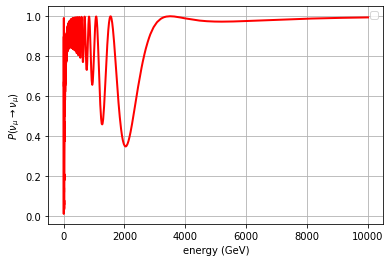

In [38]:
mass = [0.5,1,2]
anglea =[0.07,0.3,0.5]

#for idx, j in enumerate(anglea):
neutrino_flavors = 4
interactions = False
e_nodes = np.geomspace(5, 10000, 400)*units.GeV
    

nuSQ_sterile = nsq.nuSQUIDS(
    e_nodes,
    neutrino_flavors,
    nsq.NeutrinoType.antineutrino,
    interactions
    )

nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
nuSQ_sterile.Set_SquareMassDifference(3, 1)
nuSQ_sterile.Set_MixingAngle(1, 3, np.radians(10))
#nuSQ_sterile.Get_MixingAngle(1,3)    

density = 13  # g/cm^3
ye = .5  # electron fraction

nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))

Einitial = np.zeros((len(e_nodes), neutrino_flavors))
Einitial[:, 1] = 1

nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

%time
nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
nuSQ_sterile.Set_rel_error(1.0e-7)
nuSQ_sterile.Set_abs_error(1.0e-7)
nuSQ_sterile.EvolveState()    # would give density matix at time t_final

flav = 1
flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
e_range = np.geomspace(5, 10000, 1000)
probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
color_in = ['Maroon','Red','LightSalmon']
alpha_in = [1,0.7,0.4]
plt.plot(e_range,probs_fine, lw = 2, color = "red")


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
#plt.semilogx()

  


In [43]:
Res_energy= (np.cos(2*np.radians(10))) / (2* np.sqrt(2) * units.GF  * (7.6/(units.cm)**3) * (6.0221409 *10**23)*10**9) # Gev

print(Res_energy)

809.9779134937651


It is less by a factor of 4 Why ?????????????????????????

### Resonance In Earth 

No handles with labels found to put in legend.


CPU times: user 0 ns, sys: 20 µs, total: 20 µs
Wall time: 29.6 µs


Text(0.5, 0, 'energy (GeV)')

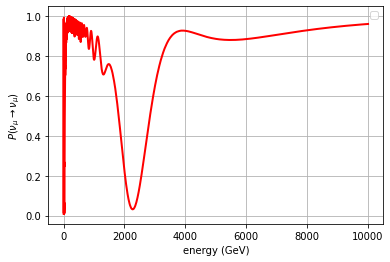

In [41]:
mass = [0.5,1,2]
anglea =[0.07,0.3,0.5]

#for idx, j in enumerate(anglea):
neutrino_flavors = 4
interactions = False
e_nodes = np.geomspace(5, 10000, 400)*units.GeV
    

nuSQ_sterile = nsq.nuSQUIDS(
    e_nodes,
    neutrino_flavors,
    nsq.NeutrinoType.antineutrino,
    interactions
    )

nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
nuSQ_sterile.Set_SquareMassDifference(3, 1)
nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
nuSQ_sterile.Set_MixingAngle(2, 3, np.arcsin(np.sqrt(0.07))/2.)

#nuSQ_sterile.Get_MixingAngle(1,3)    


nuSQ_sterile.Set_Body(nsq.EarthAtm())
nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))

Einitial = np.zeros((len(e_nodes), neutrino_flavors))
Einitial[:, 1] = 1

nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

%time
nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
nuSQ_sterile.Set_rel_error(1.0e-7)
nuSQ_sterile.Set_abs_error(1.0e-7)
nuSQ_sterile.EvolveState()    # would give density matix at time t_final

flav = 1
flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
e_range = np.geomspace(5, 10000, 1000)
probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
color_in = ['Maroon','Red','LightSalmon']
alpha_in = [1,0.7,0.4]
plt.plot(e_range,probs_fine, lw = 2, color = "red")


plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
#plt.semilogx()

  


### Effect of MassDiff on Resonance Energy 

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 23.1 µs
CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 31 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


Text(0.5, 0, 'energy (GeV)')

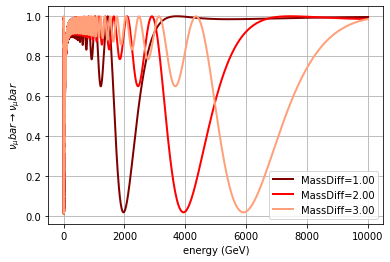

In [26]:
mass =[1,2,3]

for idx, j in enumerate(mass):
    neutrino_flavors = 4
    interactions = False
    e_nodes = np.geomspace(5, 10000, 1000)*units.GeV

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.antineutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    # we are looking at a 1 eV sterile neutrino
    nuSQ_sterile.Set_SquareMassDifference(3, j)
    nuSQ_sterile.Set_MixingAngle(1, 3, np.arcsin(np.sqrt(0.07))/2.)
    

    

    density = 13.0  # g/cm^3
    ye = .5  # electron fraction
    
    #nuSQ_sterile.Set_Body(nsq.Earth())
    #nuSQ_sterile.Set_Track(nsq.Earth.Track(1000.0*units.km))

    nuSQ_sterile.Set_Body(nsq.ConstantDensity(density, ye))
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(10000.0*units.km))
    

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 10000, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['Maroon','Red','LightSalmon']
    alpha_in = [1,0.7,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], label = "MassDiff={:0.2f}".format(j))
    


plt.legend()
plt.grid()
plt.ylabel(r"$\nu_\mu bar \rightarrow\nu_\mu bar $")
plt.xlabel("energy (GeV)")
#plt.semilogx()


### Signature of sterile neutrino 

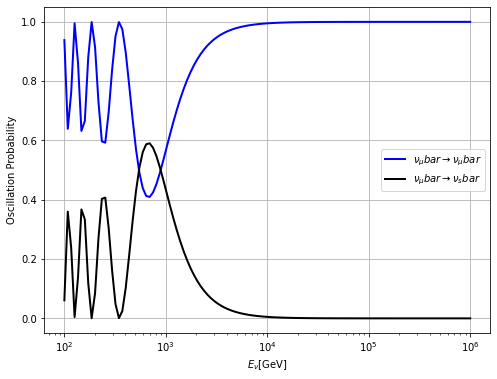

In [21]:
nuSQ = nsq.nuSQUIDS(4,nsq.NeutrinoType.antineutrino)
nuSQ.Set_Body(nsq.ConstantDensity(13.0,0.5))  # (dnsity , electron fraction )
nuSQ.Set_Track(nsq.ConstantDensity.Track(1000.0*units.km))

nuSQ.Set_MixingAngle(1, 3, np.radians(18))
nuSQ.Set_SquareMassDifference(3, 1)

#energy_value = np.logspace(2,6,120)
energy_value = np.logspace(2,6,120)
                     
                     
                    
nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
nu_mu_to_nu_s = []
for Enu in energy_value:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))
    nu_mu_to_nu_s.append(nuSQ.EvalFlavor(3))
    
                     
                     

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")
#plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(energy_value,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu bar \rightarrow \nu_\mu bar$")
#plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.plot(energy_value,nu_mu_to_nu_s, lw = 2, color = 'black', label = r"$\nu_\mu bar \rightarrow \nu_s bar$")
                    

#plt.legend(fancybox = True, fontsize = 15, loc = 7)
plt.semilogx()
plt.legend()
plt.grid()

### Octant in Vacuum

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 15.5 µs
CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 10.5 µs


[]

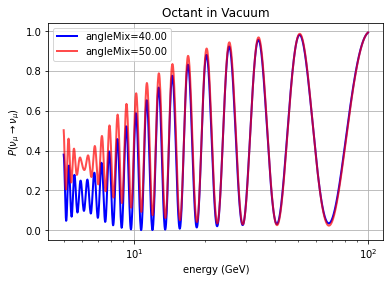

In [3]:
anglea =[40,50]

for idx, j in enumerate(anglea):
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(5, 100, 400)*units.GeV
    

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.antineutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(j))
    #nuSQ_sterile.Set_SquareMassDifference(2, 1)


    nuSQ_sterile.Set_Body(nsq.Vacuum())
    nuSQ_sterile.Set_Track(nsq.Vacuum.Track(100000*units.km))   # Long baseline

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(5, 100, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "angleMix={:0.2f}".format(j))

plt.title('Octant in Vacuum')
plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
plt.semilogx()

  


### Octant in Constdensity 

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 21.9 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


[]

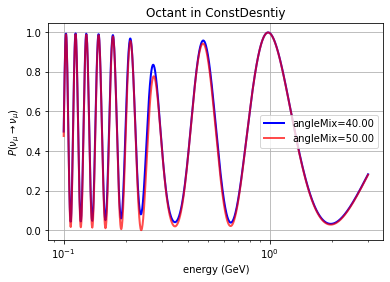

In [8]:
anglea =[40,50]

for idx, j in enumerate(anglea):
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(0.1, 3, 400)*units.GeV
    

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(j))
    #nuSQ_sterile.Set_SquareMassDifference(2, 0.05)   # 


    nuSQ_sterile.Set_Body(nsq.ConstantDensity(100.0,0.5))  # (dnsity , electron fraction )
    nuSQ_sterile.Set_Track(nsq.ConstantDensity.Track(1000.0*units.km))

    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(0.1, 3, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "angleMix={:0.2f}".format(j))

plt.title('Octant in ConstDesntiy')

plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
plt.semilogx()

  


### Octant throught Earth 

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 19.1 µs
CPU times: user 0 ns, sys: 10 µs, total: 10 µs
Wall time: 15 µs


[]

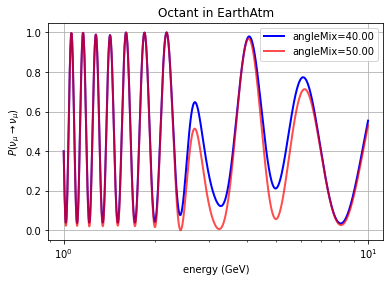

In [13]:
anglea =[40,50]

for idx, j in enumerate(anglea):
    neutrino_flavors = 3
    interactions = False
    e_nodes = np.geomspace(1, 10, 400)*units.GeV
    

    nuSQ_sterile = nsq.nuSQUIDS(
        e_nodes,
        neutrino_flavors,
        nsq.NeutrinoType.neutrino,
        interactions
    )

    nuSQ_sterile.Set_MixingParametersToDefault()
    nuSQ_sterile.Set_MixingAngle(1, 2, np.radians(j))
    nuSQ_sterile.Set_SquareMassDifference(2, 2.5e-3)
    #nuSQ_sterile.Set_SquareMassDifference(1, 1)


    #  Track
    
    nuSQ_sterile.Set_Body(nsq.EarthAtm())
    nuSQ_sterile.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))


    Einitial = np.zeros((len(e_nodes), neutrino_flavors))
    Einitial[:, 1] = 1

    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)

    %time
    nuSQ_sterile.Set_initial_state(Einitial, nsq.Basis.flavor)
    nuSQ_sterile.Set_rel_error(1.0e-7)
    nuSQ_sterile.Set_abs_error(1.0e-7)
    nuSQ_sterile.EvolveState()    # would give density matix at time t_final

    flav = 1
    flav_tex = {0: r"e", 1: r"\mu", 2: r"\tau", 3: r"s"}[flav]
    e_range = np.geomspace(1, 10, 1000)
    probs_fine = np.array([nuSQ_sterile.EvalFlavor(flav, e*units.GeV, 0) for e in e_range])
    color_in = ['blue','Red','LightSalmon','blue']
    alpha_in = [1,0.7,0.5,0.4]
    plt.plot(e_range,probs_fine, lw = 2, color = color_in[idx], alpha= alpha_in[idx], label = "angleMix={:0.2f}".format(j))

plt.title('Octant in EarthAtm')

plt.legend()
plt.grid()
plt.ylabel(fr"$P(\nu_\mu\rightarrow\nu_{flav_tex})$")
plt.xlabel("energy (GeV)")
#plt.figure(figsize = (8,6))
plt.semilogx()

  
